In [5]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import rowgenerators as rg
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [6]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# San Diego Crime Incidents with Victim Descriptions
`sandiegodata.org-crime_victims-1.1.1` Last Update: 2020-09-29T00:07:45

_Crime incidents in San Diego, from 2016 to 2020 inclusive, with UCR codes for the crime and the age, race and sex of the victim._



There are important national conversations going on about criminal justice
reform, aligning resources towards prevention and community support rather than
primarily for policing, and calls to Defund or Abolish the Police. These are
all valuable discussions about the communities in which we want to live. An
important voice in that conversation is the voice of victims of crime. The data
below is a complete data set for victims of violent crime from ARJIS (Automated
Regional Justice Information System) for San Diego County, the nation's fifth
largest County, from 2016 through 2020. The complete data set, a cleaned
version of the data, a data dictionary, the Public Records Act request on which
the data was based and several maps are provided for review. A full
conversation requires diverse voices and will help ensure that resources are
realigned in a way that furthers the dual aims of equity and safety in our
communities. 


The file has multiple rows per incident, one for each suspect or
victim. The primary key ``pk`` links records together into a single crime incident. 

## Processing

The data presented here are a processed version of the file received from San 
Diego County through a Public Records Act request. The processing includes:

* Converting the tract identifier to a formal ACS format tract geoid
* Converting the block identifier to a formal ACS format block geoid
* Adding the position of the centroid of the tracts, in WKT format
* Adding the Census internal point location, for the block, in WGS 84 latitude and longitude. 
* Recording the race field to the Census race / ethinicity scheme. 

### Race recode

The ``race`` field of the original data includes many names of regions,
countries or ethnicities. The ``census_race_eth`` field is a recode of the
``race`` field to use the race/ethnicity scheme used by the Census. The codes
used are:

* nhwhite: Non Hispanic White
* hispanic: Hispanic, of any race
* black: Black or African-American
* asian: Asian
* nhopi: Native Hawaiian or Pacific Islander. 

This file does not include any records that would be classified as the
remaining census race codes, such as American Indian or Alaskan Native. These
are the translations from the values in the ``race`` field to those of the
``census_race`` field:

* OTHER: other
* none: unknown
* WHITE: nhwhite
* HISPANIC: hisp
* BLACK: black
* MIDDLE EASTERN: white
* PACIFIC ISLANDER: nhopi
* CHINESE: asian
* JAPANESE: asian
* OTHER ASIAN: asian
* FILIPINO: asian
* ASIAN INDIAN: asian
* GUAMANIAN: nhopi
* VIETNAMESE: asian
* HAWAIIAN: nhopi
* INDIAN: asian
* CAMBODIAN: asian
* KOREAN: asian
* SAMOAN: nhopi
* LAOTIAN: asian
* EAST AFRICAN: black


For the 2020 census, Filipinos may be classified as Pacific Islanders, rather
than Asian, as they had been in previous years. Because this data was collected 
before this transition, Filipinos are classified as Asians.
## Documentation Links

* [PRA Request](http://ds.civicknowledge.org.s3.amazonaws.com/sandag.org/OPCrimeVictims/PRA%20Request%20-%20Crime%20Victims%20San%20Diego%20County.docx) PRA request issued to for the data.
* [Data Dictionary](http://ds.civicknowledge.org.s3.amazonaws.com/sandag.org/OPCrimeVictims/Omar%20Passons%20-%20Data%20Dictionary%20for%20Omar%20Passons%20Request%209.4.20.docx) Original data dictionary provided with the response, describing the original, unmodified dataset.

 
## Images

[![doc_img](doc/female_victims.png "Female Victims Per Population")](doc/female_victims.png)

Female Victims Per Population
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [sdcrime_16_20](data/sdcrime_16_20.csv)**. San Diego crime suspects and 

In [7]:
pkg.resource('sdcrime_16_20')

Header,Type,Description
pk,integer,Pk – this is an auto number generated by our SQL database when a new unique record comes into ARJIS. Note: Use this as your unique identifier.
activitynumber,string,"activityNumber - the case number for each activity/incident/crime case (these all mean the same thing), this can be used as a unique identifier when combined with the agency name"
activitydate,datetime,ActivityDate – The date/time the crime case occurred
year,integer,Year of source file
agency,string,Agency - the agency reporting the crime case
violationsection,string,"ViolationSection – the highest charge number recorded on the arrest ( i.e. most serious charge connected to the arrest, arrests may have up to ten charges)"
violationtype,string,"ViolationType – the municipal, penal or other code section which is attached to the highest recorded Violation section on the arrest"
chargedescription,string,ChargeDescription – A brief text definition of the type of crime type noted in the violation section
chargelevel,string,"ChargeLevel – whether the highest charge is a felony, misdemeanor or infraction (there should only be felonies and misdemeanors in this file)"
codeucr,string,"CodeUCR – a more specific code to define the exact crime type per Uniform Crime Reporting Standards, see defining table on last tab of excel. If you really want to get specific with crime categories this is your tool!"


In [8]:
df = pkg.resource('sdcrime_16_20').dataframe()

In [15]:
t = df.groupby('pk').first()
len(t[t.block_geoid.isnull()]), len(t[t.censusblock.isnull()])

(18837, 18837)

In [6]:
b01003 = rg.dataframe('census://2018/5/CA/tract/B01003')

In [7]:
pop = b01003[['b01003_001']].reset_index().rename(columns={'b01003_001':'total_population'})

In [8]:
tracts = rg.geoframe('census://2018/5/CA/tract')

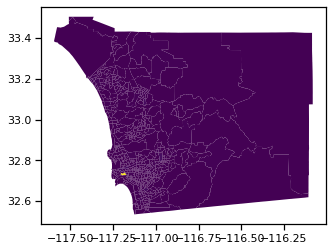

In [9]:
t = df[(df.sex == 'FEMALE') & (df.personrole == 'SUSPECT')]
t = t.groupby('tract_geoid').pk.count().to_frame('n_crimes').reset_index().rename(columns={'tract_geoid':'geoid'})
t = tracts.merge(t, on='geoid').merge(pop, on='geoid')
t['crimes_per_pop'] = (t['n_crimes']  / t['total_population']).replace({np.inf:np.nan}).fillna(0)
t['cpp_z'] = (t.crimes_per_pop-np.mean(t.crimes_per_pop))/np.std(t.crimes_per_pop)
t.to_csv('crimes.csv')
t.plot(column='cpp_z')

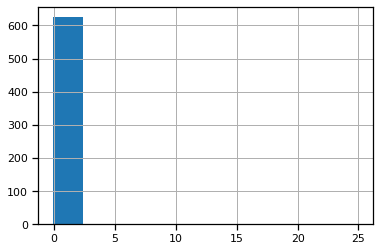

In [10]:
t.cpp_z.hist()

In [11]:
t.to_csv('crimes')

In [12]:
df.head().T

,0,1,2,3,4
pk,12144871,12127327,12278698,12278698,12364997
activitynumber,'01600014','16000042','16005661','16005661','16008822'
activitydate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
year,2016,2016,2016,2016,2016
agency,NATIONAL CITY,SAN DIEGO,SAN DIEGO,SAN DIEGO,SAN DIEGO
violationsection,10851,459,488,488,487(A)
violationtype,VC,PC,PC,PC,PC
chargedescription,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT,BURGLARY/UNSPECIFIED,PETTY THEFT,PETTY THEFT,GRAND THEFT:MONEY/LABOR/PROPERTY OVER $950
chargelevel,FELONY,FELONY,MISDEMEANOR,MISDEMEANOR,FELONY
codeucr,7A0,5A6,6DG,6DG,6AE


In [13]:
t =df.groupby('personrole').census_race.value_counts().unstack().T
t.SUSPECT/(t.SUSPECT+t.VICTIM)

census_race
asian      0.312839
black      0.649256
hisp       0.464926
nhopi      0.501545
nhwhite    0.375976
other      0.112949
unknown    0.999904
white      0.336891
dtype: float64

In [ ]:
df[(df.sex == 'FEMALE') & (df.personrole == 'VICTIM')].chargedescription.value_counts().head(20)

In [ ]:
df[(df.sex == 'MALE') & (df.personrole == 'VICTIM')].chargedescription.value_counts().head(20)